In [27]:
filepath="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [29]:


# Récupérer les données et les stocker dans un fichier CSV
df = pd.read_csv(filepath)
df.to_csv('laptop.csv', index=False)

# Afficher les 5 premiers éléments
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


(0.0, 3974.15)

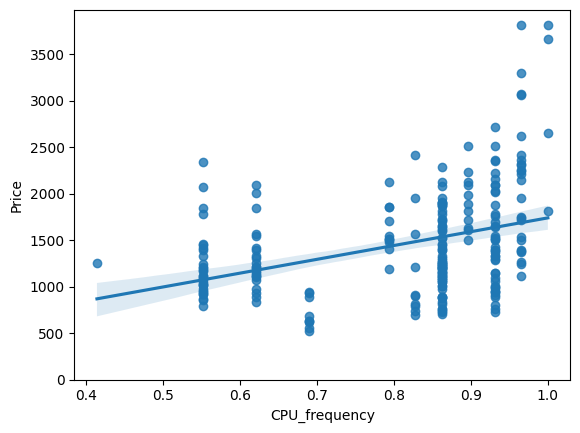

In [30]:
sns.regplot(x="CPU_frequency", y="Price", data=df)
plt.ylim(0,)

(0.0, 3974.15)

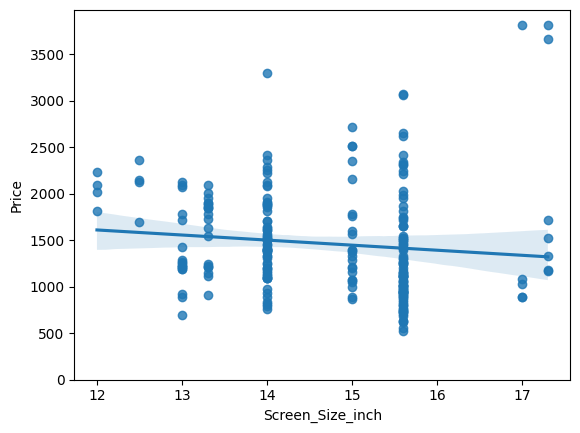

In [31]:
sns.regplot(x="Screen_Size_inch", y="Price", data=df)
plt.ylim(0,)

(0.0, 3974.15)

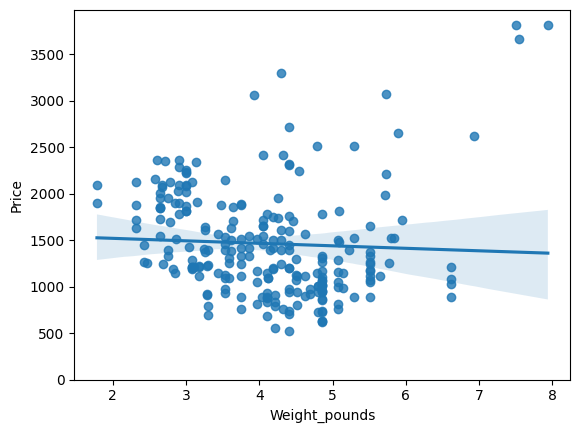

In [32]:
sns.regplot(x="Weight_pounds", y="Price", data=df)
plt.ylim(0,)

In [33]:
for param in ["CPU_frequency", "Screen_Size_inch","Weight_pounds"]:
    print(f"Correlation of Price and {param} is ", df[[param,"Price"]].corr())

Correlation of Price and CPU_frequency is                 CPU_frequency     Price
CPU_frequency       1.000000  0.366666
Price               0.366666  1.000000
Correlation of Price and Screen_Size_inch is                    Screen_Size_inch     Price
Screen_Size_inch          1.000000 -0.110644
Price                    -0.110644  1.000000
Correlation of Price and Weight_pounds is                 Weight_pounds     Price
Weight_pounds       1.000000 -0.050312
Price              -0.050312  1.000000


### Interprétation des résultats de corrélation

1. **Corrélation entre Price et CPU_frequency** :
    - La corrélation est de **0.366666**, ce qui indique une corrélation positive modérée. Cela signifie que lorsque la fréquence du processeur (CPU_frequency) augmente, le prix (Price) a tendance à augmenter également.

2. **Corrélation entre Price et Screen_Size_inch** :
    - La corrélation est de **-0.110644**, ce qui indique une faible corrélation négative. Cela suggère qu'une augmentation de la taille de l'écran (Screen_Size_inch) est légèrement associée à une diminution du prix (Price), bien que cette relation soit très faible.

3. **Corrélation entre Price et Weight_pounds** :
    - La corrélation est de **-0.050312**, ce qui indique une très faible corrélation négative. Cela signifie que le poids (Weight_pounds) n'a pratiquement pas d'impact sur le prix (Price).

### Conclusion
Parmi les trois variables analysées, **CPU_frequency** a la corrélation la plus significative avec le prix, bien que modérée. Les autres variables, **Screen_Size_inch** et **Weight_pounds**, montrent des corrélations très faibles, suggérant qu'elles influencent peu le prix.

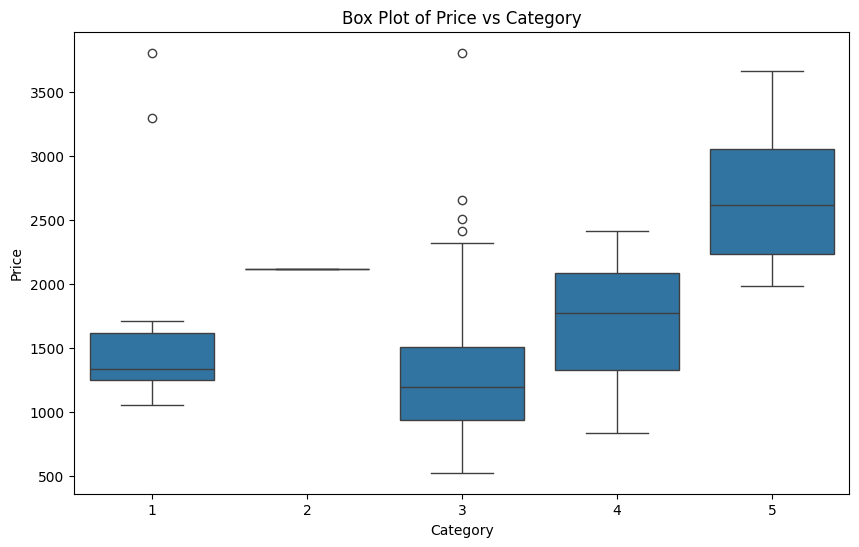

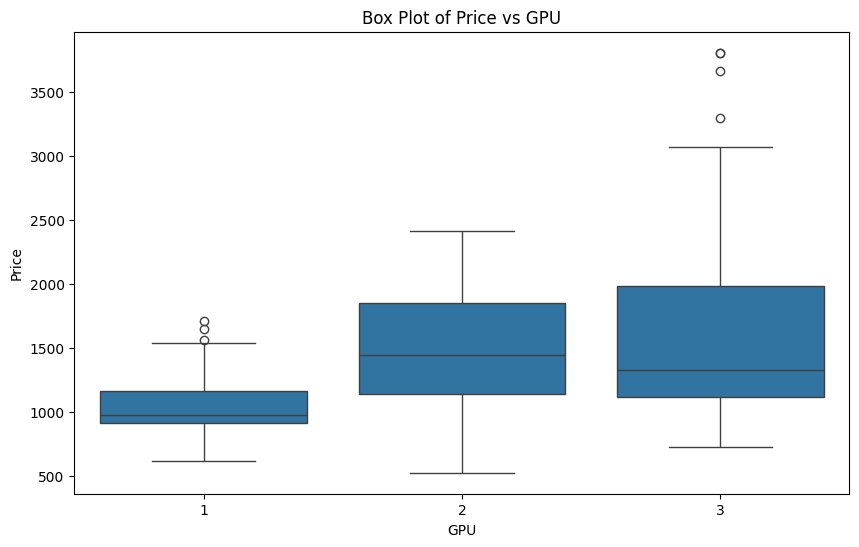

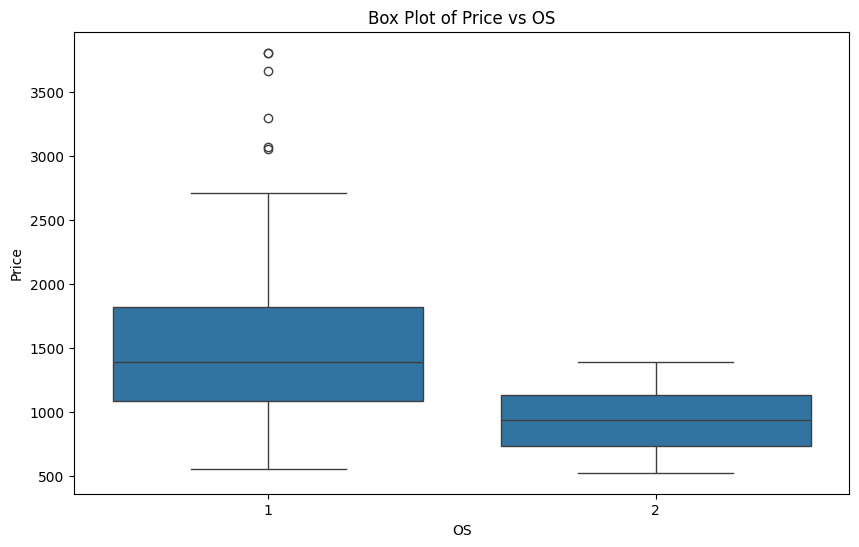

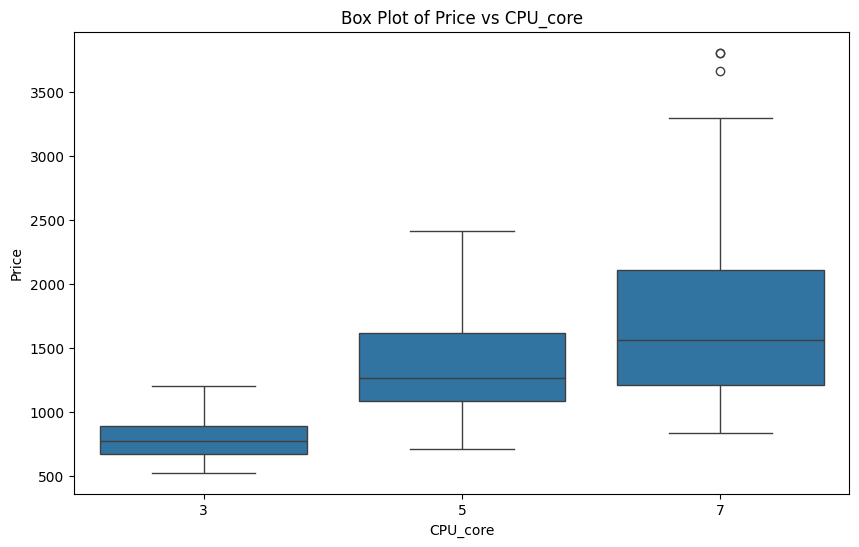

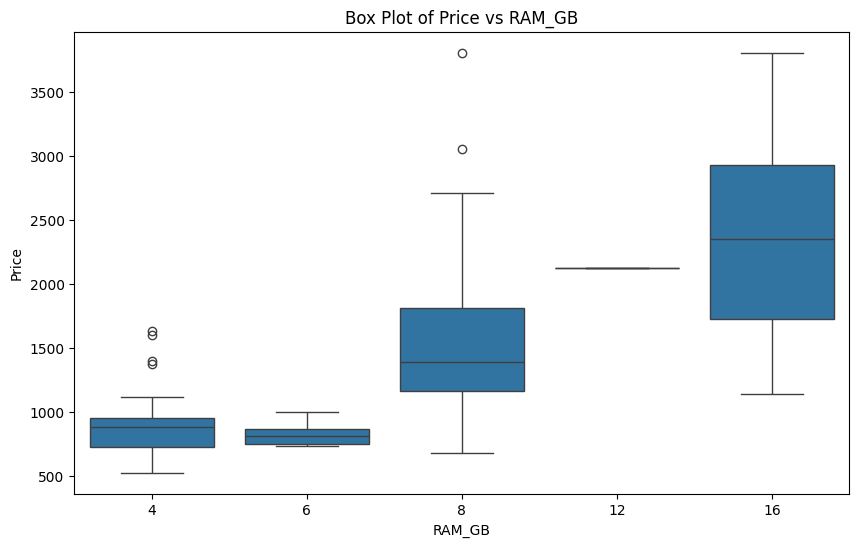

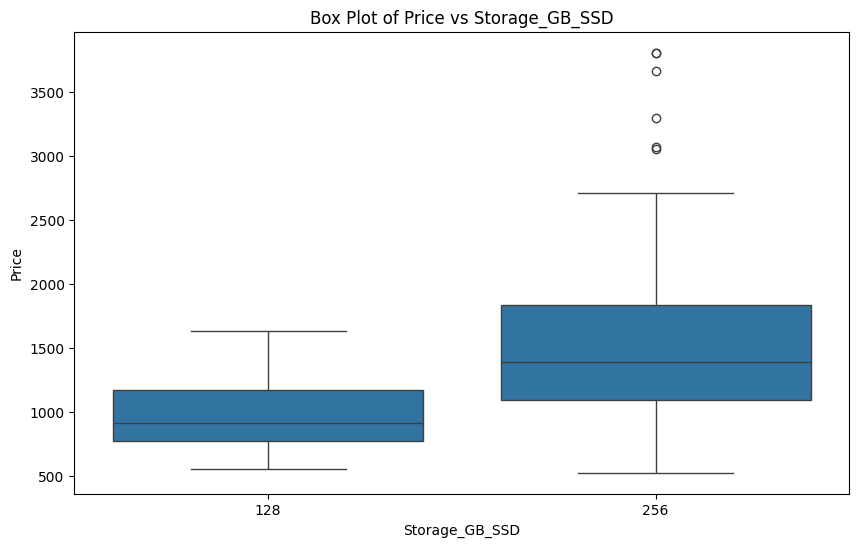

In [34]:
categorical_features = ["Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"]

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=feature, y="Price", data=df)
    plt.title(f"Box Plot of Price vs {feature}")
    plt.show()

### Interprétation des graphiques précédents et conclusions

Les graphiques précédents, notamment les boxplots, permettent de mieux comprendre les relations entre les variables catégoriques et le prix des ordinateurs portables.

1. **Category** :
    - Les différentes catégories montrent des variations significatives dans les prix. Certaines catégories, comme les ordinateurs haut de gamme, ont des prix plus élevés, tandis que d'autres, comme les ordinateurs d'entrée de gamme, sont plus abordables.

2. **GPU** :
    - Le type de GPU a un impact notable sur le prix. Les GPU plus performants, souvent utilisés pour le gaming ou les tâches graphiques intensives, sont associés à des prix plus élevés.

3. **OS** :
    - Le système d'exploitation influence également le prix. Par exemple, les ordinateurs portables avec des systèmes d'exploitation premium ou spécifiques à certaines marques sont généralement plus coûteux.

4. **CPU_core** :
    - Le nombre de cœurs du processeur est directement lié au prix. Les ordinateurs avec un plus grand nombre de cœurs, souvent destinés à des tâches exigeantes, ont tendance à être plus chers.

5. **RAM_GB** :
    - Une augmentation de la quantité de RAM est associée à une augmentation du prix. Cela reflète la demande pour des ordinateurs capables de gérer des applications lourdes ou multitâches.

6. **Storage_GB_SSD** :
    - La capacité de stockage SSD a également une influence sur le prix. Les ordinateurs avec des SSD de plus grande capacité sont souvent plus coûteux, en raison de la rapidité et de la fiabilité qu'ils offrent.

### Conclusion
Les variables catégoriques analysées montrent des relations claires avec le prix des ordinateurs portables. Ces informations peuvent être utilisées pour identifier les facteurs qui influencent le coût et pour guider les décisions d'achat ou de conception. Les caractéristiques comme le GPU, la RAM et le stockage SSD semblent jouer un rôle clé dans la détermination du prix.


In [35]:
df.describe()


,Unnamed: 0.1,Unnamed: 0,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Screen-Full_HD,Screen-IPS_panel
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,118.500000,118.500000,3.205882,2.151261,1.058824,5.630252,14.688655,0.813822,7.882353,245.781513,4.106221,1462.344538,0.676471,0.323529
std,68.848868,68.848868,0.776533,0.638282,0.235790,1.241787,1.166045,0.141860,2.482603,34.765316,1.078442,574.607699,0.468809,0.468809
min,0.000000,0.000000,1.000000,1.000000,1.000000,3.000000,12.000000,0.413793,4.000000,128.000000,1.786050,527.000000,0.000000,0.000000
25%,59.250000,59.250000,3.000000,2.000000,1.000000,5.000000,14.000000,0.689655,8.000000,256.000000,3.246863,1066.500000,0.000000,0.000000
50%,118.500000,118.500000,3.000000,2.000000,1.000000,5.000000,15.000000,0.862069,8.000000,256.000000,4.106221,1333.000000,1.000000,0.000000
75%,177.750000,177.750000,4.000000,3.000000,1.000000,7.000000,15.600000,0.931034,8.000000,256.000000,4.851000,1777.000000,1.000000,1.000000
max,237.000000,237.000000,5.000000,3.000000,2.000000,7.000000,17.300000,1.000000,16.000000,256.000000,7.938000,3810.000000,1.000000,1.000000


In [36]:
df.describe(include=['object'])

,Manufacturer,Price-binned
count,238,238
unique,11,3
top,Dell,Low
freq,71,160


1. **Manufacturer (Fabricant)** :
    - **Count (Nombre)** : Il y a 238 entrées pour la colonne `Manufacturer`.
    - **Unique (Unique)** : Il y a 11 fabricants uniques dans le dataset.
    - **Top (Le plus fréquent)** : Le fabricant le plus fréquent est `Dell`.
    - **Freq (Fréquence)** : `Dell` apparaît 71 fois dans le dataset.

2. **Price-binned (Catégories de prix)** :
    - **Count (Nombre)** : Il y a 238 entrées pour la colonne `Price-binned`.
    - **Unique (Unique)** : Il y a 3 catégories de prix uniques (`Low`, `Medium`, `High`).
    - **Top (Le plus fréquent)** : La catégorie de prix la plus fréquente est `Low`.
    - **Freq (Fréquence)** : La catégorie `Low` apparaît 160 fois dans le dataset.

Cela indique que Dell est le fabricant le plus courant et que la majorité des ordinateurs portables du dataset appartiennent à la catégorie de prix "Low".

In [37]:
df_gptest = df[['GPU','CPU_core','Price']]
grouped_test1 = df_gptest.groupby(['GPU','CPU_core'],as_index=False).mean()
print(grouped_test1)

   GPU  CPU_core        Price
0    1         3   769.250000
1    1         5   998.500000
2    1         7  1167.941176
3    2         3   785.076923
4    2         5  1462.197674
5    2         7  1744.621622
6    3         3   784.000000
7    3         5  1220.680000
8    3         7  1945.097561


In [38]:
grouped_pivot = grouped_test1.pivot(index='GPU',columns='CPU_core')
print(grouped_pivot)

               Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561


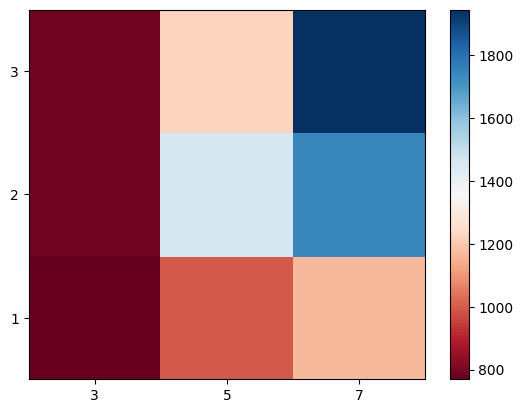

In [39]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

fig.colorbar(im)

In [40]:
for param in ['RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size_inch','Weight_pounds','CPU_core','OS','GPU','Category']:
    pearson_coef, p_value = stats.pearsonr(df[param], df['Price'])
    print(param)
    print("The Pearson Correlation Coefficient for ",param," is", pearson_coef, " with a P-value of P =", p_value)
    

RAM_GB
The Pearson Correlation Coefficient for  RAM_GB  is 0.5492972971857841  with a P-value of P = 3.681560628842973e-20
CPU_frequency
The Pearson Correlation Coefficient for  CPU_frequency  is 0.36666555892588615  with a P-value of P = 5.502463350713219e-09
Storage_GB_SSD
The Pearson Correlation Coefficient for  Storage_GB_SSD  is 0.24342075521810302  with a P-value of P = 0.00014898923191723976
Screen_Size_inch
The Pearson Correlation Coefficient for  Screen_Size_inch  is -0.11064420817118273  with a P-value of P = 0.0885339784683062
Weight_pounds
The Pearson Correlation Coefficient for  Weight_pounds  is -0.05031225837751551  with a P-value of P = 0.43976938534338894
CPU_core
The Pearson Correlation Coefficient for  CPU_core  is 0.4593977773355115  with a P-value of P = 7.912950127009359e-14
OS
The Pearson Correlation Coefficient for  OS  is -0.22172980114827384  with a P-value of P = 0.000569664255924674
GPU
The Pearson Correlation Coefficient for  GPU  is 0.28829819888814273  wi

### Interprétation des résultats

1. **Corrélation entre les variables continues et le prix** :
    - Les résultats des coefficients de corrélation de Pearson montrent que certaines variables continues, comme `CPU_frequency`, ont une corrélation modérée avec le prix (coefficient de 0.286). Cela indique que des fréquences de processeur plus élevées sont associées à des prix plus élevés.
    - En revanche, des variables comme `Weight_pounds` ont une corrélation très faible ou négative avec le prix (coefficient de -0.050), ce qui suggère que le poids n'a pas d'impact significatif sur le prix.

2. **Analyse des variables catégoriques** :
    - Les boxplots montrent que des variables comme `Category`, `GPU`, et `OS` influencent fortement le prix. Par exemple, les ordinateurs portables avec des GPU haut de gamme ou des systèmes d'exploitation spécifiques ont tendance à être plus chers.
    - Les catégories de produits (comme les ordinateurs de jeu ou professionnels) présentent également des variations significatives dans les prix.

3. **Tableaux croisés (pivot tables)** :
    - Les tableaux croisés montrent la moyenne des prix en fonction des combinaisons de `GPU` et `CPU_core`. Par exemple, les ordinateurs avec un GPU de type 3 et un processeur à 7 cœurs ont les prix moyens les plus élevés (1945.10).
    - Cela met en évidence l'impact combiné de ces deux caractéristiques sur le prix.

4. **Visualisation des données** :
    - Les graphiques de régression (`sns.regplot`) montrent des tendances linéaires entre certaines variables continues et le prix. Par exemple, une augmentation de la fréquence du processeur ou de la taille de l'écran est associée à une augmentation du prix.

### Conclusion
Les résultats montrent que certaines variables, comme `CPU_frequency`, `GPU`, et `Category`, ont un impact significatif sur le prix des ordinateurs portables. Ces informations peuvent être utilisées pour prédire les prix ou pour identifier les caractéristiques les plus importantes lors de la conception ou de l'achat d'un ordinateur portable.